<a href="https://colab.research.google.com/github/diegomarlop/LAB_IRONHACK/blob/main/Lab7_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lab | Cross Validation

In [1]:
import pandas as pd 
import numpy as np 
import warnings 
warnings.filterwarnings('ignore')

1. Apply SMOTE for upsampling the data

Use logistic regression to fit the model and compute the accuracy of the model.

Use decision tree classifier to fit the model and compute the accuracy of the model.

Compare the accuracies of the two models.

In [2]:
churnData = pd.read_csv('Customer-Churn.csv')
churnData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [3]:
churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'],errors='coerce')

In [ ]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7032 non-null   float64
 15  Churn             7043 non-null   object 
dtypes: float64(2), int64(2), object(12)
memory

In [ ]:
for i in churnData:
  print(i,':',churnData[i].isna().sum())

gender : 0
SeniorCitizen : 0
Partner : 0
Dependents : 0
tenure : 0
PhoneService : 0
OnlineSecurity : 0
OnlineBackup : 0
DeviceProtection : 0
TechSupport : 0
StreamingTV : 0
StreamingMovies : 0
Contract : 0
MonthlyCharges : 0
TotalCharges : 11
Churn : 0


In [ ]:
for i in churnData:
  print(churnData[i].value_counts(dropna=False))

Male      3555
Female    3488
Name: gender, dtype: int64
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64
No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, 

In [4]:
churnData['TotalCharges'] = churnData['TotalCharges'].fillna(np.mean(churnData['TotalCharges']))

In [ ]:
for i in churnData:
  print(i,':',churnData[i].isna().sum())

gender : 0
SeniorCitizen : 0
Partner : 0
Dependents : 0
tenure : 0
PhoneService : 0
OnlineSecurity : 0
OnlineBackup : 0
DeviceProtection : 0
TechSupport : 0
StreamingTV : 0
StreamingMovies : 0
Contract : 0
MonthlyCharges : 0
TotalCharges : 0
Churn : 0


In [5]:
churnData = churnData.drop(['gender','Partner','Dependents','PhoneService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','Churn'],axis=1)

In [ ]:
churnData


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


In [6]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
y=churnData['SeniorCitizen']
X=churnData.drop(['SeniorCitizen'],axis=1)
X_sm,y_sm=smote.fit_resample(X,y)
y_sm.value_counts()

0    5901
1    5901
Name: SeniorCitizen, dtype: int64

In [ ]:
X_sm

,tenure,MonthlyCharges,TotalCharges
0,1,29.850000,29.850000
1,34,56.950000,1889.500000
2,2,53.850000,108.150000
3,45,42.300000,1840.750000
4,2,70.700000,151.650000
...,...,...,...
11797,69,82.519826,5679.501437
11798,58,65.326677,3885.379360
11799,55,97.957484,5617.797772
11800,61,99.502942,6171.057938


In [ ]:
y_sm

0        0
1        0
2        0
3        0
4        0
        ..
11797    1
11798    1
11799    1
11800    1
11801    1
Name: SeniorCitizen, Length: 11802, dtype: int64

In [7]:
from sklearn.preprocessing import StandardScaler
transformer=StandardScaler().fit(X_sm)
x_stan=transformer.transform(X_sm)

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_stan,y_sm,test_size=0.2, random_state=1000)

In [9]:
from sklearn.linear_model import LogisticRegression
classification=LogisticRegression(random_state=0,solver='lbfgs',multi_class='ovr').fit(X_train,y_train)

In [10]:
predictions=classification.predict(X_test)

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import cohen_kappa_score
import matplotlib.pyplot as  plt 

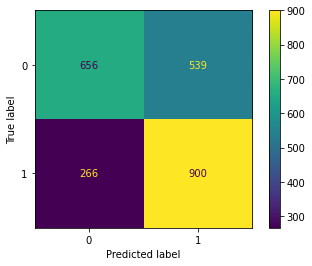

In [12]:
plot_confusion_matrix(classification,X_test,y_test)
plt.show()

In [13]:
cohen_kappa_score(y_test,predictions) 

0.31991475161352545

In [14]:
from sklearn.model_selection import cross_val_score
cross_val_score(classification, X_train, y_train, cv=10).mean()

0.6559677383194332

In [15]:
###desiciontree
churnData = pd.read_csv('Customer-Churn.csv')
churnData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [16]:
churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'],errors='coerce')

In [17]:
churnData['TotalCharges'] = churnData['TotalCharges'].fillna(np.mean(churnData['TotalCharges']))

In [18]:
churnData = churnData.drop(['gender','Partner','Dependents','PhoneService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','Churn'],axis=1)

In [19]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
y=churnData['SeniorCitizen']
X=churnData.drop(['SeniorCitizen'],axis=1)
X_sm,y_sm=smote.fit_resample(X,y)
y_sm.value_counts()

0    5901
1    5901
Name: SeniorCitizen, dtype: int64

In [20]:
from sklearn.preprocessing import StandardScaler
transformer=StandardScaler().fit(X_sm)
x_stan=transformer.transform(X_sm)

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_stan,y_sm,test_size=0.2, random_state=1000)

In [22]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [23]:
model.score(X_test,y_test)

-0.26895584590367405

In [24]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X_train, y_train, cv=10).mean()

-0.272966234678679

2. Apply TomekLinks for downsampling

It is important to remember that it does not make the two classes equal but only removes the points from the majority class that are close to other points in minority class.

Use logistic regression to fit the model and compute the accuracy of the model.

Use decision tree classifier to fit the model and compute the accuracy of the model.

Compare the accuracies of the two models.

You can also apply this algorithm one more time and check the how the imbalance in the two classes changed from the last time.

In [25]:
churnData = pd.read_csv('Customer-Churn.csv')
churnData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [26]:
churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'],errors='coerce')

In [27]:
churnData['TotalCharges'] = churnData['TotalCharges'].fillna(np.mean(churnData['TotalCharges']))

In [28]:
churnData = churnData.drop(['gender','Partner','Dependents','PhoneService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','Churn'],axis=1)

In [29]:
from imblearn.under_sampling import TomekLinks
tome = TomekLinks('majority',n_jobs=-1)
y=churnData['SeniorCitizen']
X=churnData.drop(['SeniorCitizen'],axis=1)
X_sm,y_sm=tome.fit_resample(X,y)
y_sm.value_counts()

0    5366
1    1142
Name: SeniorCitizen, dtype: int64

In [30]:
from sklearn.preprocessing import StandardScaler
transformer=StandardScaler().fit(X_sm)
x_stan=transformer.transform(X_sm)

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_stan,y_sm,test_size=0.2, random_state=1000)

In [32]:
from sklearn.linear_model import LogisticRegression
classification=LogisticRegression(random_state=0,solver='lbfgs',multi_class='ovr').fit(X_train,y_train)

In [33]:
predictions=classification.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import cohen_kappa_score
import matplotlib.pyplot as  plt 

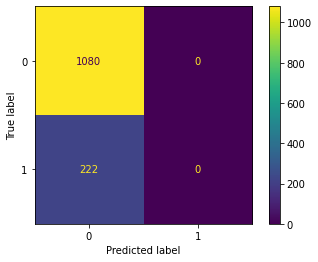

In [35]:
plot_confusion_matrix(classification,X_test,y_test)
plt.show()

In [36]:
cohen_kappa_score(y_test,predictions) 

0.0

In [37]:
from sklearn.model_selection import cross_val_score
cross_val_score(classification, X_train, y_train, cv=10).mean()

0.8232806732614794

In [ ]:
###DecisionTree

In [38]:
churnData = pd.read_csv('Customer-Churn.csv')
churnData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [39]:
churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'],errors='coerce')

In [40]:
churnData['TotalCharges'] = churnData['TotalCharges'].fillna(np.mean(churnData['TotalCharges']))

In [41]:
churnData = churnData.drop(['gender','Partner','Dependents','PhoneService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','Churn'],axis=1)

In [42]:
from imblearn.under_sampling import TomekLinks
tome = TomekLinks('majority',n_jobs=-1)
y=churnData['SeniorCitizen']
X=churnData.drop(['SeniorCitizen'],axis=1)
X_sm,y_sm=tome.fit_resample(X,y)
y_sm.value_counts()

0    5366
1    1142
Name: SeniorCitizen, dtype: int64

In [43]:
from sklearn.preprocessing import StandardScaler
transformer=StandardScaler().fit(X_sm)
x_stan=transformer.transform(X_sm)

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_stan,y_sm,test_size=0.2, random_state=1000)

In [45]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [46]:
model.score(X_test,y_test)

-0.8199122177733291

In [47]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X_train, y_train, cv=10).mean()

-0.7923963321718224